In [1]:
from MLimports2 import *
exec(MLimports())


from copy import copy
from lightgbm import LGBMClassifier as LGB
from scipy import stats
from sklearn import metrics,neighbors,preprocessing
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import precision_score
fro

In [2]:
from sklearn.linear_model import QuantileRegressor

In [123]:
X,Y = getBFS(part=[5,-1],dataset='a')
X = X.values

In [124]:
zipped = list(zip(X,Y))
X = [A for A,B in sorted(zipped, key = lambda x: x[1])]
Y = [B for A,B in sorted(zipped, key = lambda x: x[1])]
X = np.array(X)
Y = np.array(Y)

In [87]:
#QUANTILED

from sklearn.model_selection import KFold

RES=[]

kf = KFold(n_splits=10,shuffle=False)

kf.get_n_splits(X,Y)
RMSEQ = []

for train_index, test_index in kf.split(X,Y):
#             print('k')
    Xtr, Xte = X[train_index], X[test_index]
    Ytr, Yte = Y[train_index], Y[test_index]
    #reg = QuantileRegressor(quantile=quantile, alpha=0)
    reg = XGBRegressor(n_estimators=150,verbosity = 0)
    reg.fit(Xtr,Ytr)
    preds = reg.predict(Xte)
    RMSEQ.append(np.sqrt(mse(Yte,preds)))
#     RMSEQ.append(mape(Yte,preds))
            
RES.append([np.mean(RMSEQ),np.std(RMSEQ)])
print(RES[-1])

[66.41859826165862, 45.843493276510266]


In [155]:
RES=[]

kf = KFold(n_splits=10,shuffle=True)

kf.get_n_splits(X,Y)
RMSEQ = []

for train_index, test_index in kf.split(X,Y):
    Xtr, Xte = X[train_index], X[test_index]
    Ytr, Yte = Y[train_index], Y[test_index]
    reg = XGBRegressor(n_estimators=350,verbosity = 0)
    reg.fit(Xtr,Ytr)
    preds = reg.predict(Xte)
    RMSEQ.append(np.sqrt(mse(Yte,preds)))


In [156]:
RMSEQ

[58.033465914479855,
 35.272086804733945,
 45.15763871358063,
 81.12830161070828,
 57.677462708625455,
 92.02634839463795,
 94.27136734291784,
 70.39178288106343,
 98.14809337183857,
 76.2484835862898]

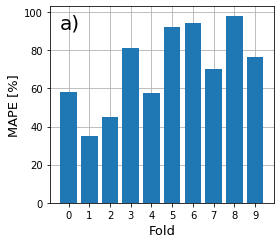

In [157]:
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(4,3.5))
plt.bar(np.array(list(range(len(RMSEQ)))),RMSEQ)
plt.xlabel('Fold',fontsize=13)
plt.ylabel('MAPE [%]',fontsize=13)
plt.xticks(np.arange(0,10))
plt.text(-0.4, max(RMSEQ)*0.93, 'a)', fontsize = 20)
plt.grid()
# plt.ylim(0,90)
plt.tight_layout()
plt.savefig('A_KF.pdf')
# plt.title('10 quantiled time-folds')

In [112]:
[np.quantile(Y,A) for A in np.linspace(0.0,1,10)]

[10.0, 29.0, 29.0, 30.0, 44.0, 47.0, 72.0, 108.0, 360.0, 2715.0]

In [101]:
from sklearn.model_selection import KFold

RES=[]

kf = KFold(n_splits=10,shuffle=True)

kf.get_n_splits(X,Y)
RMSE = []


for train_index, test_index in kf.split(X,Y):
#             print('k')
    Xtr, Xte = X[train_index], X[test_index]
    Ytr, Yte = Y[train_index], Y[test_index]
    #reg = QuantileRegressor(quantile=quantile, alpha=0)
#     for i in range(10):
    reg = XGBRegressor(n_estimators=100,verbosity = 0)
    reg.fit(Xtr,Ytr)
    preds = reg.predict(Xte)
    RMSE.append(np.sqrt(mse(Yte,preds)))
            
RES.append([np.mean(RMSE),np.std(RMSE)])
print(RES[-1])

[49.95608084175136, 7.333926505347353]


In [102]:
RMSE

[49.40480450880131,
 51.73428926895006,
 47.030082339087336,
 50.65605126405232,
 42.50628689118303,
 43.62171836222986,
 46.24212844494563,
 50.87276134896721,
 70.16020917363426,
 47.33247681566265]

Text(0.5, 1.0, '10-folds')

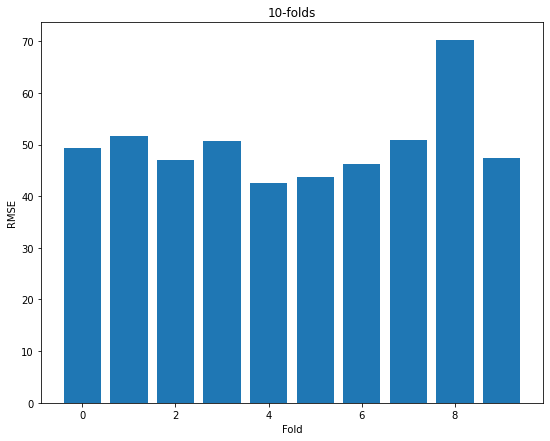

In [103]:
plt.bar(list(range(len(RMSE))),RMSE)
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('10-folds')

In [14]:
reg = QuantileRegressor(quantile=0.5,alpha=0.5)

In [15]:
reg.fit(X,Y)

c:\users\user\python39\lib\site-packages\sklearn\linear_model\_quantile.py:268: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 1: Iteration limit reached.
Result message of linprog:
The iteration limit was reached before the algorithm converged.
  warnings.warn(


QuantileRegressor(alpha=0.5)